# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### Business Context

The advent of e-news, or electronic news, portals have offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


### Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


### Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [1]:
# imported necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import scipy.stats as stats 
from scipy.stats import norm 
from scipy.stats import binom 

## Reading the Data into a DataFrame

In [2]:
data = pd.read_csv("abtest.csv")
data.head()
df=data.copy()
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observation 
- Reading the data using pandas and making a copy of the data.
- Used the head to see the data of 5 records 
- The data has 6 cloumns 

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

#### Viewing the first and last few rows of the dataset

In [3]:
df.tail() 

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Observation 
- Used the tail to obtain the last 5 records of the table
- from the above we have head to obtain first 5 records of the table 

#### Checking the shape of the dataset

In [4]:
df.shape

(100, 6)

#### Observation 
- The 100 rows and 6 Column 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observation 
- The dataSet has 6 Cloumns and 100 rows 
- The DataSet has 1 float, 1 Int and 4 Object 
- The dataSet has non null values 

#### Getting the statistical summary for the variables

In [6]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Observation 
- UserId are the unique number in the Dataset we can ignore for now
- Time_spent_on_the_page mean and medium are almost same which is slightly normal distrubuted 
- time_spent_on_the_page min 0.190 and max 10.710 


#### Find the count for the categorical variable

In [7]:
cat = ["group", "landing_page", "converted", "language_preferred"]
for i , value in enumerate (cat):
    print(df[value].value_counts())
    print("##"*25)

group
control      50
treatment    50
Name: count, dtype: int64
##################################################
landing_page
old    50
new    50
Name: count, dtype: int64
##################################################
converted
yes    54
no     46
Name: count, dtype: int64
##################################################
language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64
##################################################


#### Observation 
- The sample of 100 users are evenly distrubuted for group, landing_page.
- There are 3 languages spanish, French, English in language_preferred catogory.
- The converted has 2 catogories which gives 54 are conveted and 46 didn't converted.


#### Check for missing values

In [8]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observsation 
- There is no missing values in the tables 

#### Check for duplicates

In [9]:
df.duplicated().value_counts()

False    100
Name: count, dtype: int64

#### Observation 
- There is Zero dulicate values in the DataSet.

### Univariate Analysis

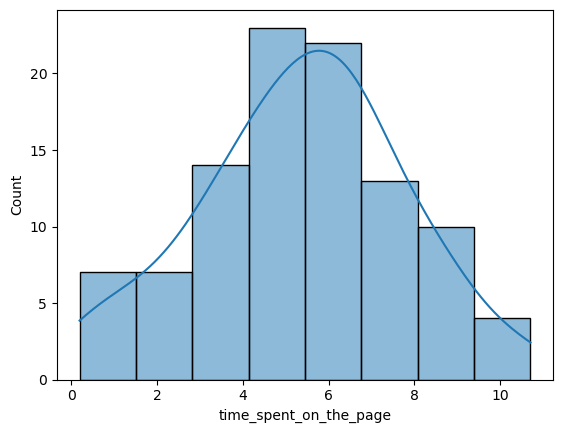

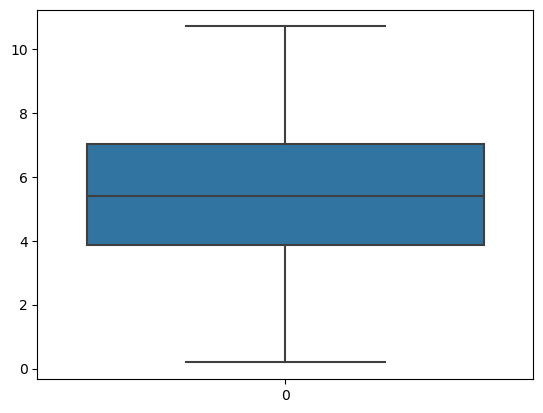

In [10]:
sns.histplot(data=df,x="time_spent_on_the_page",kde=True)
plt.show()
sns.boxplot(data["time_spent_on_the_page"]);

#### Observation
- time_spent_on_the_page has the normal distrubution 
- time_spent_on_the_page with the mean 5.377800 and the range start from 0.190000 to 10.710000.
- time_spent_on_the_page has no outliers 

### Bivariate Analysis

#### COUNTPLOT  for the catogary relation 

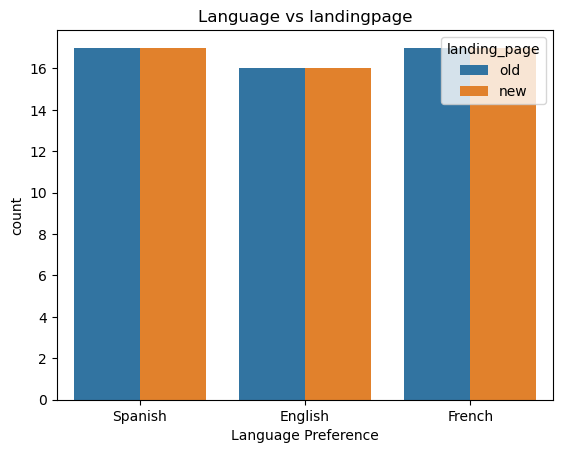

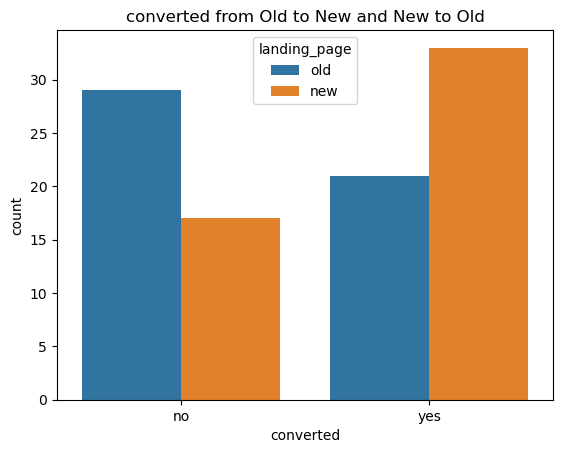

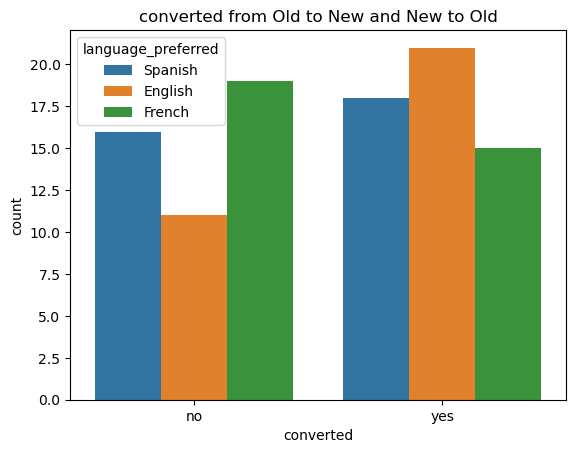

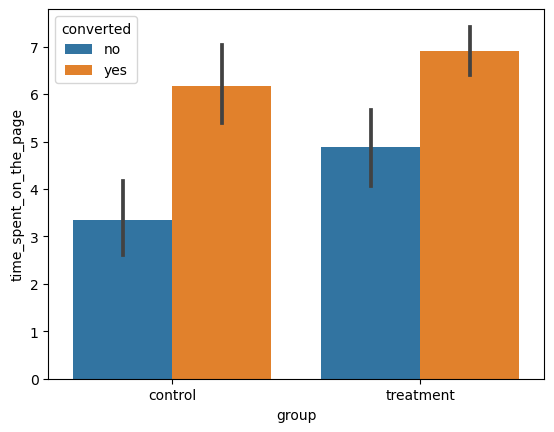

In [11]:
sns.countplot(data = df,x="language_preferred", hue="landing_page" );
plt.xlabel("Language Preference");
plt.title("Language vs landingpage");
plt.show()
sns.countplot(data=df,x="converted",hue="landing_page" );
plt.xlabel("converted");
plt.title("converted from Old to New and New to Old");
plt.show()
sns.countplot(data=df,x="converted",hue="language_preferred" );
plt.xlabel("converted");
plt.title("converted from Old to New and New to Old");
plt.show()
sns.barplot(data = df, x = 'group', y = 'time_spent_on_the_page', hue = 'converted');

#### Observation 
- language_preferred for english is the least compared to spanish and french.
- Majority of the user converted from the new to old compared to Old to new.
- French Language user have not conveted from the old to new site.
- English language user have moved to Old site.
- Spanish user are remained sightly same on the old and new site.



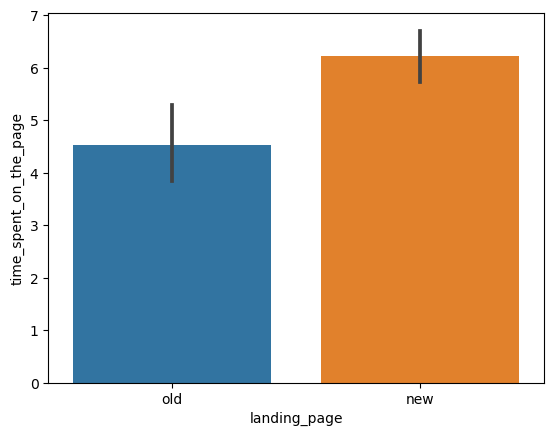

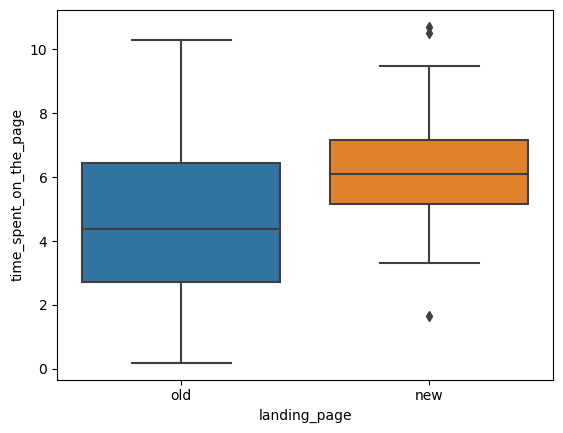

In [12]:
sns.barplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

#### Histplot for the timespent vs language 

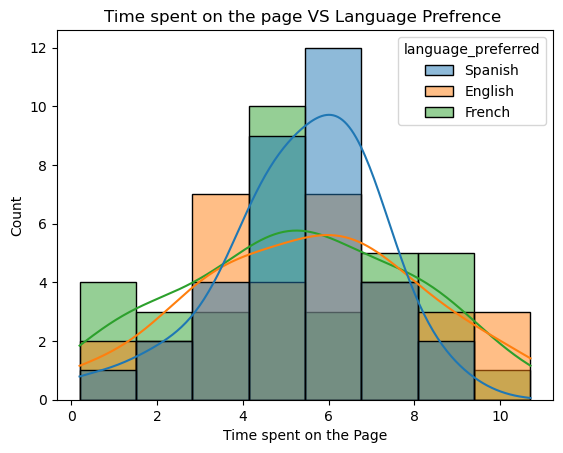

In [13]:
sns.histplot(data=df,x="time_spent_on_the_page",kde=True,hue="language_preferred");
plt.xlabel("Time spent on the Page");
plt.title("Time spent on the page VS Language Prefrence ");

In [14]:
df.groupby(["language_preferred","converted"])["time_spent_on_the_page"].mean()


language_preferred  converted
English             no           3.810909
                    yes          6.474762
French              no           3.861579
                    yes          7.016000
Spanish             no           4.052500
                    yes          6.468889
Name: time_spent_on_the_page, dtype: float64

In [15]:
df.groupby(["language_preferred","converted"])["time_spent_on_the_page"].sum()

language_preferred  converted
English             no            41.92
                    yes          135.97
French              no            73.37
                    yes          105.24
Spanish             no            64.84
                    yes          116.44
Name: time_spent_on_the_page, dtype: float64

#### Observation 
- People who spent more time on the site had conveted compared to less time spent.
- English User are less in number compared to other user but the time spent by converted in english users are highest compared to others.
- English user Who not converted spent less time compared to the others non conveted user.
- Spanish language user spent more time compared to other preferd language user.
- French language user who not conveted spent more time compared to other non converted users. 

In [16]:
df.groupby(["language_preferred","converted","landing_page"])["time_spent_on_the_page"].sum()

language_preferred  converted  landing_page
English             no         new             33.04
                               old              8.88
                    yes        new             73.58
                               old             62.39
French              no         new             22.00
                               old             51.37
                    yes        new             83.34
                               old             21.90
Spanish             no         new             27.96
                               old             36.88
                    yes        new             71.24
                               old             45.20
Name: time_spent_on_the_page, dtype: float64

#### Observation 
- Time spent on the new page by treatment is highest compared to the old page time spent by control. 
- French who converted to new landing page spent more time 83.34 and followed by English 73.58.
- English Language who not conveted from old landing page spent less time 8.88.

## 1. Do the users spend more time on the new landing page than the existing landing page?

In [17]:
df.groupby(["language_preferred","converted","landing_page","group"])["time_spent_on_the_page"].sum()

language_preferred  converted  landing_page  group    
English             no         new           treatment    33.04
                               old           control       8.88
                    yes        new           treatment    73.58
                               old           control      62.39
French              no         new           treatment    22.00
                               old           control      51.37
                    yes        new           treatment    83.34
                               old           control      21.90
Spanish             no         new           treatment    27.96
                               old           control      36.88
                    yes        new           treatment    71.24
                               old           control      45.20
Name: time_spent_on_the_page, dtype: float64

#### Observation 
- The New landing page is assigned to treatment and the old page is assigned to control.
- The max time spent on new landing page is higher than the old landing page.
- converted users is higher in the new landing page.

### Perform Visual Analysis 

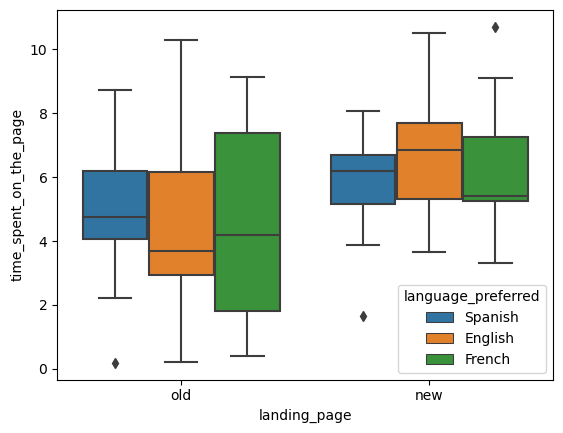

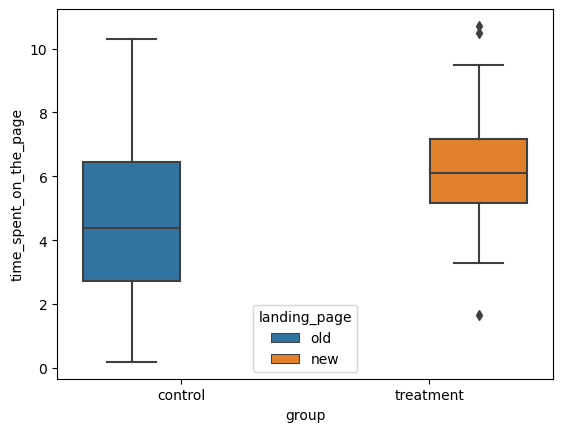

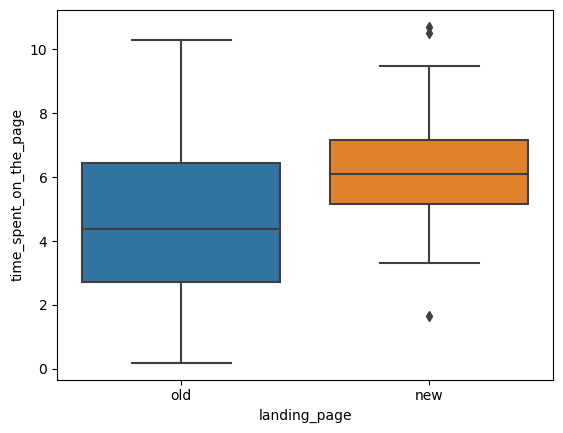

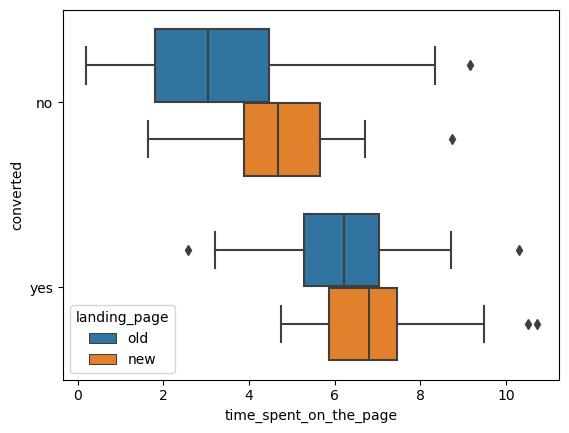

In [18]:
sns.boxplot(data=df,x="landing_page",y="time_spent_on_the_page",hue="language_preferred");
plt.show();
sns.boxplot(data=df,x="group",y="time_spent_on_the_page",hue="landing_page");
plt.show();
sns.boxplot(data=df,x="landing_page",y="time_spent_on_the_page")
plt.show()
sns.boxplot(data=df,x="time_spent_on_the_page",y="converted",hue="landing_page");

#### Observation
- Time spent on the new page by treatment is highest compared to the old page time spent by control.
- The average time spent on the new page seems greater than the old page.
- The converted ration is also highest on new landidng page compared to old landing page.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the use of the new landing page and old landing page respectivly.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$ : The mean time spent by the users on the new page is equal to the mean time spent by the users on the old page

against the alternate hypothesis

>$H_a:\mu_1\neq\mu_2$ :The mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.


In [19]:
# find the sample means and sample standard deviations for the two samples
print('The mean usage old landing page is ' + str(df[df['landing_page']=="old"]["time_spent_on_the_page"].mean()))
print('The mean usage new landing page is ' + str(df[df["landing_page"]=="new"]["time_spent_on_the_page"].mean()))
print('The standard deviation of old landing page is ' + str(round(df[df['landing_page']=="old"]["time_spent_on_the_page"].std(),2)))
print('The standard deviation of new landing page is ' + str(round(df[df['landing_page']=="new"]["time_spent_on_the_page"].std(),2)))

The mean usage old landing page is 4.532400000000001
The mean usage new landing page is 6.2232
The standard deviation of old landing page is 2.58
The standard deviation of new landing page is 1.82


### Step 2: Select Appropriate test
#### Let's test whether the T-test assumptions are satisfied or not
- Continuous data - Yes.
- Normally distributed populations - Yes.
- Independent populations - As the sample are randomly picked and independent to each other.
- Equal population standard deviations - As the sample standard deviations are equal, the population standard deviations may be assumed to be equal.
- Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### T-test assumptions are satisfied 

### Step 3: Decide the significance level

- significance level of 5% is given which is going to be 0.05 

### Step 4: Collect and prepare data

In [20]:
df["Time_spent_old_page"]=df[df['landing_page']=="old"]["time_spent_on_the_page"]
df["Time_spent_new_page"]=df[df["landing_page"]=='new']["time_spent_on_the_page"]

### Step 5: Calculate the p-value

In [25]:
from scipy.stats import ttest_ind 
test_stat,p_value=ttest_ind(df["Time_spent_new_page"].dropna(),df["Time_spent_old_page"].dropna(),equal_var = False, alternative = 'greater')
p_value

0.00013923812251665497

In [51]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 6: Compare the p-value with $\alpha$

- $\alpha$ 0.05 ,  p-value : 0.00014
- $\alpha$ > p-value 
- By comparing the $\alpha$ with p-value we can reject the null hypotheses. The mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

### Step 7:  Draw inference

Since the p-value is much less than the level of significance of 5%, the null hypothesis is rejected. This means that there is significant evidence that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [33]:
converted_landing=pd.crosstab(df['landing_page'],df['converted'])
converted_landing

converted,no,yes
landing_page,,
new,17,33
old,29,21


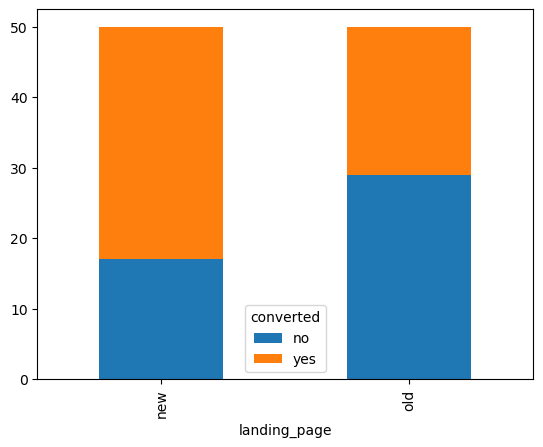

In [39]:
pd.crosstab(df['landing_page'],df['converted']).plot(kind='bar',stacked=True);

#### Observation 
- Pople likely to subscribe to new landing page compared to old page 


#### Step 1: Define the null and alternate hypotheses

Let  𝑝1,𝑝2
  be the proportion of users who visit the landing page and get converted

The conversion rate will test the null hypothesis

𝐻0:𝑝1=𝑝2
 
against the alternate hypothesis

𝐻𝑎:𝑝1≠𝑝2


### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a product is either defective or non-defective.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{21-50}{50} =29 \geq 10 $


In [47]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
defect_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value_1 = proportions_ztest(defect_count, nobs,alternative ='larger')
print('The p-value is ' + str(p_value_1))

The p-value is 0.008026308204056278


#### Compare the p-value with  𝛼

In [50]:
if p_value_1 < 0.05:
    print(f'As the p-value {p_value_1} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value_1} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


#### Step 7: Draw inference
Since the p-value is much less than the level of significance of 5%, the null hypothesis is rejected. This means that there is significant evidence that the new page greater than the conversion rate for the old page.

## 3. Is the conversion and preferred language are independent or related?

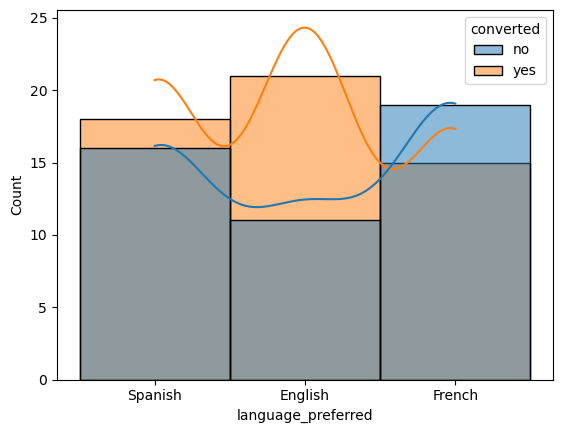

In [59]:
sns.histplot(data=df,x="language_preferred",hue='converted',kde=True);

In [85]:
lan_convert=pd.crosstab(df["language_preferred"],df["converted"])
lan_convert

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


#### Observation 
- In Language Preferrence English has more converted rate.
 


#### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ conversion and preferred language are independent.

against the alternate hypothesis

>$H_a:$ conversion and preferred language are depends.

#### Let's test whether the assumptions are satisfied or not
- Categorical variables - Yes
- Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
- Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

In [77]:
from scipy.stats import chi2_contingency
df_1=df.copy()
statistic,pvalue,bar,check=chi2_contingency(lan_convert)
pvalue

0.2129888748754345

#### Compare the p-value with  𝛼

In [80]:
if pvalue < 0.05:
    print(f'As the p-value {pvalue} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pvalue} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


#### Step 7: Draw inference
Since the p-value is much greater than the level of significance of 5%, the null hypothesis is failed rejected. This means that there is significant evidence that conversion and preferred language are independent.

## 4. Is the time spent on the new page same for the different language users?

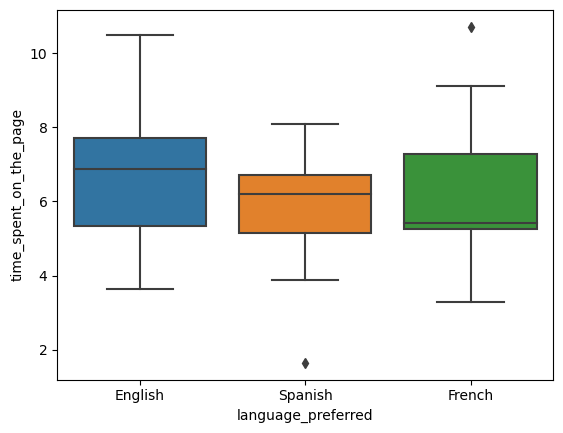

In [115]:
new_landing_page=df.loc[df["landing_page"]=="new"].reset_index()
sns.boxplot(data=new_landing_page,x="language_preferred",y='time_spent_on_the_page');

In [118]:
new_landing_page.groupby(["language_preferred"])["time_spent_on_the_page"].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

#### Observation 
- English preferred users spent more time on the new page compared to other language users 

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time_spent_on_the_page on new page  type language_preferred respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one time_spent_on_the_page is different from the rest.


### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ time_spent_on_the_page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ time_spent_on_the_page does not follow a normal distribution

In [119]:
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(new_landing_page['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [120]:
from scipy.stats import levene
statistic, p_value = levene( new_landing_page['time_spent_on_the_page'][new_landing_page['language_preferred']=="English"], 
                                   new_landing_page['time_spent_on_the_page'][new_landing_page['language_preferred']=="French"], 
                                   new_landing_page['time_spent_on_the_page'][new_landing_page['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.



### Let's find the p-value

In [121]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(new_landing_page.loc[new_landing_page['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              new_landing_page.loc[new_landing_page['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              new_landing_page.loc[new_landing_page['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


In [122]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')


As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


Since the p-value is greater than the level of significance at 5%, the null hypothesis fails to be rejected. This means that the mean time spent on the new landing page is relatively similar regardless of the preferred language.

## Conclusion and Business Recommendations

- In order to answer the question if users spend more time on the new landing page than the existing landing page, a two-sample independent t-test was performed. A p-value of 0.0001 was resulted from the test, which is less than the level of significance of 5%. Therefore, the null hypothesis is rejected. What this means in context is that there is significant evidence that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.
- In order to answer the question if the conversion rate for the new page is greater than the conversion rate of the old page, a two-proportion z-test was performed. A p-value of 0.008 was resulted from the test, which is less than the level of significance of 5%. Therefore, the null hypothesis is rejected. What this means in context is that there is significant evidence that the conversion rate of the new landing page was greater than the conversion rate of the old landing page.
- In order to answer the question if the conversion status andn preferred language are related, a chi-square test for independence was performed. A p-value of 0.213 was resulted from the test, which is more than the level of significance of 5%. Therefore, the null hypothesis is failed to be rejected. What this means in context is that conversion status and the preferred langauge of the landing page are independent of each other.
- In order to answer the question if the time spent on the new landing page differed based on preferred language, a one-way ANOVA test was performed. A p-value of 0.432 was resulted from the test, which is more than the level of significance of 5%. Therefore, the null hypothesis is failed to be rejected. What this means in context is that the mean time spent on the new landing page was realtively similar across all the preferred languages.


___